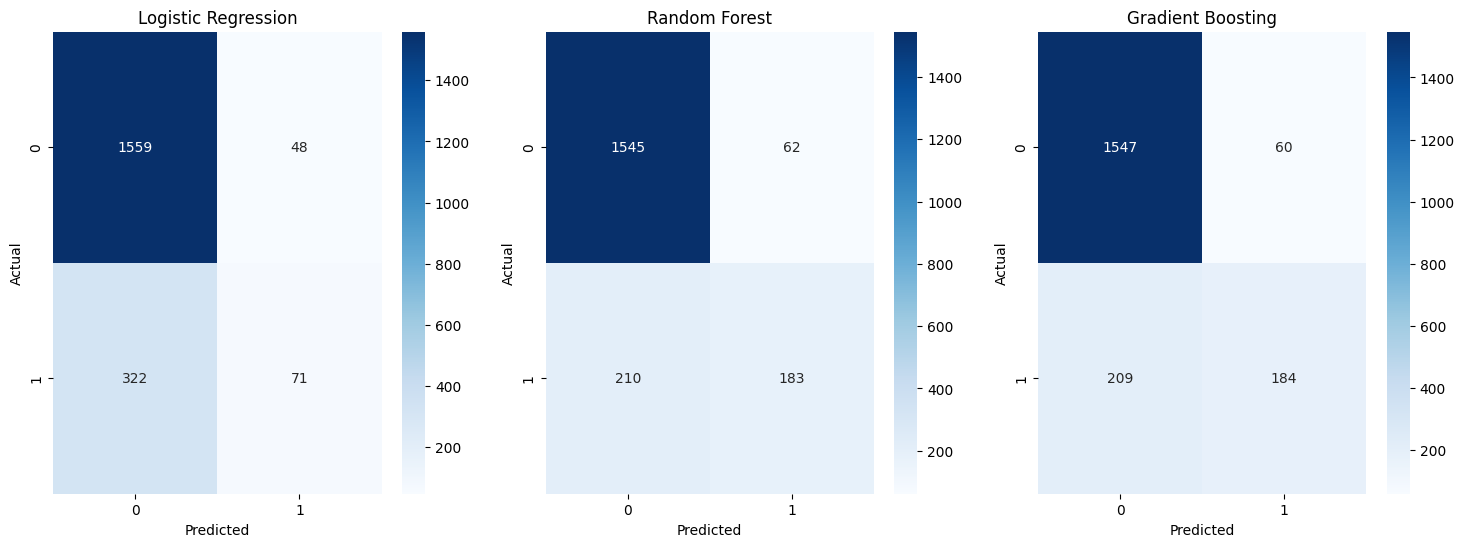

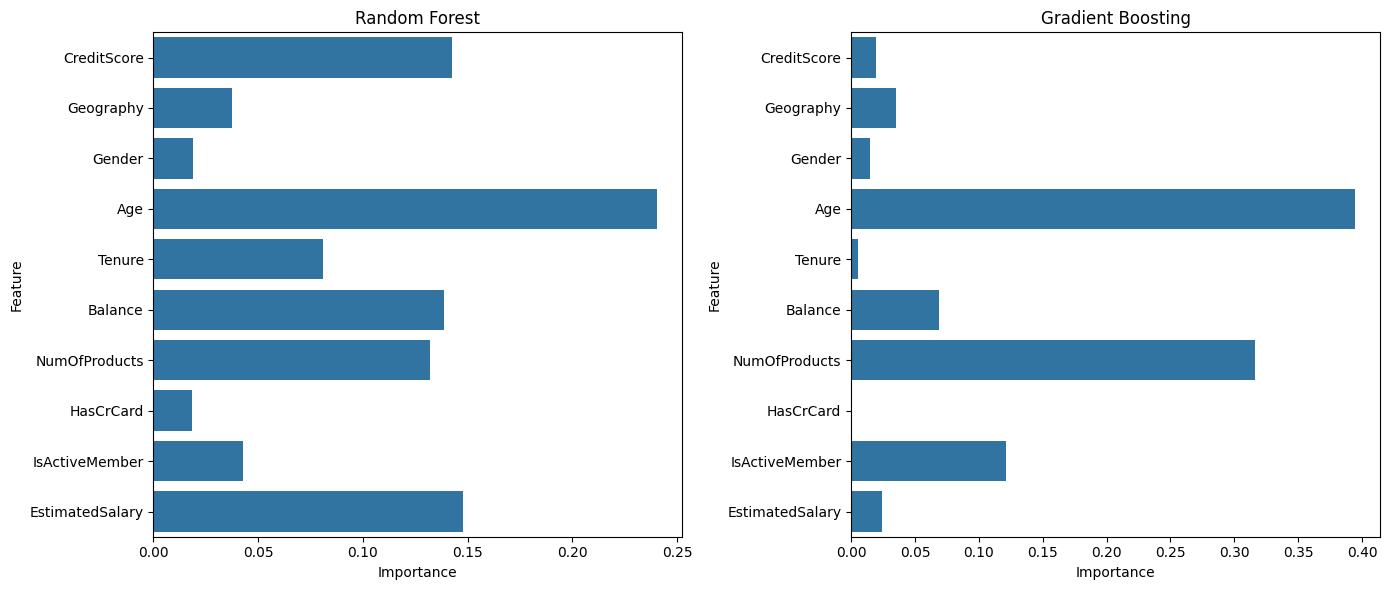

Logistic Regression Results:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Random Forest Result:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Gradient Boosting Result:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75     

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Churn.csv'
data = pd.read_csv(file_path)

le_geography = LabelEncoder()
data['Geography'] = le_geography.fit_transform(data['Geography'])

le_gender = LabelEncoder()
data['Gender'] = le_gender.fit_transform(data['Gender'])

# Preprocess the data
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])


X = data.drop(columns=['Exited'])
y = data['Exited']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset for Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Models
log_reg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Training the models
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)


log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
rf_acc = accuracy_score(y_test, y_pred_rf)
gb_acc = accuracy_score(y_test, y_pred_gb)

log_reg_report = classification_report(y_test, y_pred_log_reg)
rf_report = classification_report(y_test, y_pred_rf)
gb_report = classification_report(y_test, y_pred_gb)

# Confusion matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Graphs
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Gradient Boosting')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.show()

importances_rf = rf.feature_importances_
importances_gb = gb.feature_importances_

feature_names = X.columns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=importances_rf, y=feature_names, ax=axes[0])
axes[0].set_title('Random Forest')
axes[0].set_xlabel('Importance')
axes[0].set_ylabel('Feature')

sns.barplot(x=importances_gb, y=feature_names, ax=axes[1])
axes[1].set_title('Gradient Boosting')
axes[1].set_xlabel('Importance')
axes[1].set_ylabel('Feature')

plt.tight_layout()
plt.show()

# Print Results
print("Logistic Regression Results:\n", log_reg_report)
print("Random Forest Result:\n", rf_report)
print("Gradient Boosting Result:\n", gb_report)
